# Preprocessing and analysing Chinese text

The course covers basic Python code that can get you started using programming as a tool for text processing, quantitative analysis and text and data mining.

In more technical terms, we review concepts such as variables, values, the data types text strings, lists and loops.

We go through an example of how to retrieve text data, prepare data and use the jieba library. Jieba is used to divide text into words and subdivides traditional Chinese.

_Source: https://github.com/fxsjy/jieba_

In [ ]:
#! pip install jieba

In [1]:
# Webscrape libraries
from bs4 import BeautifulSoup
import requests

# For preprocessing and analysing
import jieba
import nltk
import re

We create a variable that we use to store the url to the pages that we want to webscrape.

We need to scrape this wikipedia page: 反对逃犯条例修订草案运动

In [2]:
# store the url in a variable
url_zh = 'https://zh.wikipedia.org/zh-cn/%E5%8F%8D%E5%B0%8D%E9%80%83%E7%8A%AF%E6%A2%9D%E4%BE%8B%E4%BF%AE%E8%A8%82%E8%8D%89%E6%A1%88%E9%81%8B%E5%8B%95'

We insert one of the variable names into request.get('url') below.

In [3]:
# get data
page = requests.get(url_zh)

# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
# find all 'headline3 and paragraph-tags'
tags = soup.find_all(['h1', 'h3', 'p'])

# Parse the text from the p_tags ajd 'join' a returned list into the variable called 'text'
text = ' '.join([p.get_text() for p in tags]).strip()

In [5]:
text [0:100]

'反对逃犯条例修订草案运动 其他诉求：\n 中央政府：\n 香港政府：\n 反对《逃犯条例修订草案》运动（英语：Anti-Extradition Law Amendment Bill Movement，常简称'

## Preparation of text
### Cleaning

The text consists of Latin letters and Chinese characters.

If you want to sort out the Latin letters, you can use the code below.

Sources:

https://stackoverflow.com/questions/2718196/find-all-chinese-text-in-a-string-using-python-and-regex

https://unicode-table.com/en/blocks/cjk-unified-ideographs/

In [6]:
chinese_list = re.findall(r'[\u4e00-\u9fff]+', text)

In [7]:
chinese_list[0:20]

['反对逃犯条例修订草案运动',
 '其他诉求',
 '中央政府',
 '香港政府',
 '反对',
 '逃犯条例修订草案',
 '运动',
 '英语',
 '常简称反修例运动或反送中运动',
 '是香港一场于',
 '年',
 '月',
 '日',
 '注',
 '爆发的大型社会运动',
 '最终导致逾万人被捕',
 '此次运动并无统一的领导',
 '主要以社交媒体号召的方式组织',
 '运动支持者以游行示威',
 '集会']

The list can then be assembled into a text string again with .join()

_Source: "https://www.w3schools.com/python/ref_string_join.asp"_   

In [8]:
chinese_text = ' '.join(chinese_list)

In [9]:
chinese_text[0:200]

'反对逃犯条例修订草案运动 其他诉求 中央政府 香港政府 反对 逃犯条例修订草案 运动 英语 常简称反修例运动或反送中运动 是香港一场于 年 月 日 注 爆发的大型社会运动 最终导致逾万人被捕 此次运动并无统一的领导 主要以社交媒体号召的方式组织 运动支持者以游行示威 集会 静坐 唱歌 呐喊 三罢 行动 设置连侬墙 不合作运动 堵塞道路干道 起底 私了 纵火 破坏商铺及公共设施等一系列行为 要求香港'

### Text segmentation / tokenisation

In the jieba.lcut method, we insert a text string or, as in this case, a variable containing a text string, and we control the cut mode. The L in .lcut() indicates that the method returns a list. 'Cut_all=True' should give the most possible hyphenation of the text, be fast, but less accurate. 'Cut_all=False' should be more accurate than the first, and thus more suitable for text analysis. _Source: https://github.com/fxsjy/jieba_

In [10]:
seg_list1 = jieba.lcut(chinese_text, cut_all=False)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lakj\AppData\Local\Temp\jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built successfully.


In [11]:
seg_list1[0:20]

['反对',
 '逃犯',
 '条例',
 '修订',
 '草案',
 '运动',
 ' ',
 '其他',
 '诉求',
 ' ',
 '中央政府',
 ' ',
 '香港政府',
 ' ',
 '反对',
 ' ',
 '逃犯',
 '条例',
 '修订',
 '草案']

We get returned many fields consisting of 'white_space'.

To see these lines removed from our data, we use 'if' to put a condition into the code. We write, if our lines consist of characters that are not equal to 'white space', then we are interested in storing it in the variable seg_list2.

In [12]:
seg_list2 = [item for item in seg_list1 if item != ' ']

In [13]:
seg_list2[0:20]

['反对',
 '逃犯',
 '条例',
 '修订',
 '草案',
 '运动',
 '其他',
 '诉求',
 '中央政府',
 '香港政府',
 '反对',
 '逃犯',
 '条例',
 '修订',
 '草案',
 '运动',
 '英语',
 '常',
 '简称',
 '反修']

As shown above, lists are made using square brackets ( [ ] ).

You can access the elements in the list by referring to the index number. Again, we can use both positive and negative numbers. Remember that in Python the first index number is 0 and not 1, which means we access the first and last element of the list like this:

In [14]:
print (seg_list2[0])
print (seg_list2[-1])

反对
标签


## Part of Speech Tagging (POS)

Jieba's part of speech tagger returns the words and tags in two different elements. To use the pos tagger, import 'import jieba.posseg as pseg'.

According to the documentation, you use pseg after .cut( 'text_string' ). Source: "4. Part of Speech Tagging https://github.com/fxsjy/jieba"

We get returned words and tags. They are in .word and .flag. In the documentation, the programmer shows how to print words and tags, but I would like to have all words and tags stored as pairs in a list. Therefore I use a tuple which is a python data type and add each word and tag pair to a list which I call 'pos'. Source: Python Tuples https://www.w3schools.com/python/python_tuples.asp_

In [15]:
import jieba.posseg as pseg
words = pseg.cut(chinese_text)
pos_tags = []
for w in words:
    if w.word > ' ':
        word_tag = tuple((w.word, w.flag))
        pos_tags.append(word_tag)

In [16]:
pos_tags[0:20]

[('反对', 'd'),
 ('逃犯', 'v'),
 ('条例', 'n'),
 ('修订', 'v'),
 ('草案', 'n'),
 ('运动', 'vn'),
 ('其他', 'r'),
 ('诉求', 'v'),
 ('中央政府', 'nt'),
 ('香港政府', 'nt'),
 ('反对', 'd'),
 ('逃犯', 'v'),
 ('条例', 'n'),
 ('修订', 'v'),
 ('草案', 'n'),
 ('运动', 'vn'),
 ('英语', 'nz'),
 ('常', 'd'),
 ('简称', 'v'),
 ('反修', 'v')]

I am writing a for loop that contains a condition ('if'). With the loop I go through the list of tuples. If the first element of the 'tuple' ([1]) is equal to 'v' I add the first element ([0]) to the list 'words'.

In [17]:
words = []
for item in pos_tags:
    if item[1] == 'v':
        words.append(item[0])

In [18]:
words[0:20] 

['逃犯',
 '修订',
 '诉求',
 '逃犯',
 '修订',
 '简称',
 '反修',
 '例',
 '反送',
 '是',
 '注',
 '爆发',
 '导致',
 '被捕',
 '无',
 '号召',
 '组织',
 '静坐',
 '呐喊',
 '罢']

Before looking at the distribution of words with 'v' tags, we need to address the fact that python by default cannot print Chinese characters. Therefore, we import 'matplotlib.pyplot as plt' and change font.family to "Microsoft YaHei".

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft YaHei"  # husk på mac skal man bruge  'Heiti TC'

After this we can import nltk and use nltk.FreqDist().

<Axes: xlabel='Samples', ylabel='Counts'>

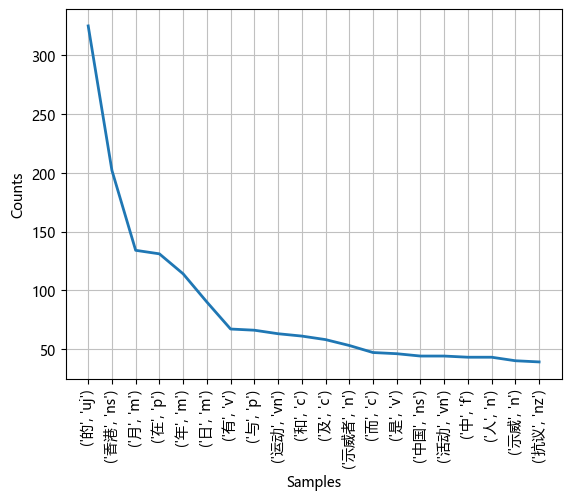

In [20]:
import nltk
nltk.FreqDist(pos_tags).plot(20)

## Task: try replacing 'v' with other tags.
## Stop words

Stop words are small words that are often not meaningful words.

We therefore need to load a stop word list. It is online at Science data at this link: https://sciencedata.dk/shared/93a217a0533d949d9b2c675cd3c99cfd?download.

To retrieve the file we use "from urllib.request import urlopen".

In [21]:
from urllib.request import urlopen

target_url = 'https://sciencedata.dk/shared/93a217a0533d949d9b2c675cd3c99cfd?download'

sw_ch = urlopen(target_url).read().decode('utf-8').split()

Now all the texts can be filtered for stop words.

In [22]:
filtered_tokens = []
for word in seg_list2:
    if word not in sw_ch:
        filtered_tokens.append(word)

Now all the texts can be filtered for stop words.

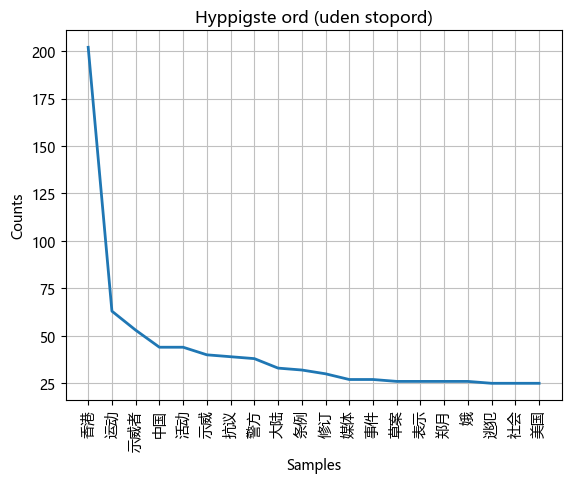

In [23]:
fdist_filtered = nltk.FreqDist(filtered_tokens).plot(20, title='Hyppigste ord (uden stopord)')

In [24]:
long_tokens = []

for word in filtered_tokens:
    if len(word) > 4:
        long_tokens.append(word)

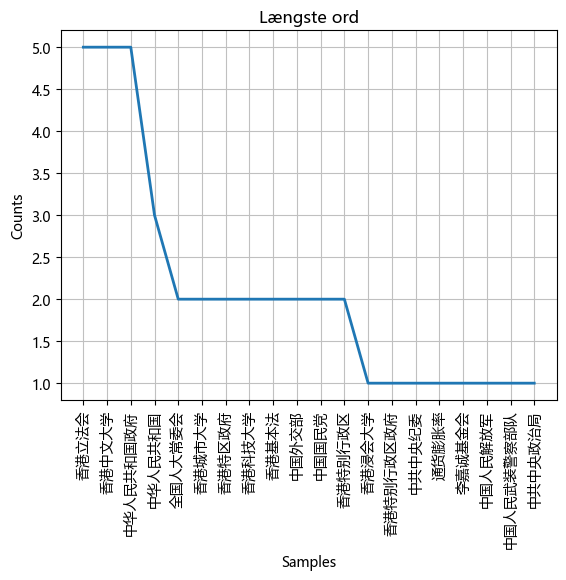

In [25]:
fdist_filtered = nltk.FreqDist(long_tokens).plot(20, title='Længste ord')

## NLTK methods

I have used nltk many times, but never with Chinese text. We experiment and create an nltk text object which should allow us to use various nltk methods.

In [26]:
nltk_text = nltk.Text(seg_list2)

collocation_list() returns a list of the most common word pairs in the text. Note that in some versions of Python, collocation_list() does not work. If this is the case, try _collocations()_ instead.

In [29]:
nltk_text.collocation_list()

[('总领事馆', '外交官'), ('电视广播', '有限公司'), ('总书记', '习近平'), ('香港中文大学', '学生会')]

The concordance() method returns the context of a specific expression. The length of the output can be changed with the parameters in width and lines.

In [30]:
nltk_text.concordance('反对', lines=30, width=40)

Displaying 14 of 14 matches:
                   反对 逃犯 条例 修订 草案 运动 其他 
运动 其他 诉求 中央政府 香港政府 反对 逃犯 条例 修订 草案 运动 英语 
陆 接受 刑事 调查 及 审判 故而 反对 修例 香港 工商界 金融界 学术界 
法律界 等 多个 行业 亦 均 提出 反对 意见 担忧 修订 草案 削弱 香港 
月初 的 舆论 调查 有 受访 市民 反对 逃犯 条例 修订 草案 而 草案 若
求 之后 也 有 建制 派 成员 不 反对 撤回 多名 行政 会议 成员 建制 
 香港 多家 报纸 刊登 整版 广告 反对 暴力行为 呼吁 以 和平 方式 解决
阂 增大 导致 许多 中国 大陆 人 反对 这次 抗议 活动 中国 官方 媒体 
 以 暴力 方式 处理 群众运动 也 反对 采取 激烈 手段 驱离 民众 港府 
 不同 不能 相提并论 国民党 坚决 反对 一国两制 也 坚决 反对 台湾独立 
民党 坚决 反对 一国两制 也 坚决 反对 台湾独立 坚守 一中 各表 的 九二
也 在 西方 各 大城市 举行 集会 反对 香港 的 抗议 活动 年 月 日 美
 冲绳 的 口号 也 在 日本 传播 反对 方 俄罗斯外交部 发言人 玛丽亚 扎
 的 打压 香港 在 年 中旬 发生 反对 逃犯 条例 修订 运动 美国 通过 


To identify words that appear in a similar context, we can use the similar() method.

I have a notion that the method gives better results the longer the text is.

In [31]:
# similar til "politi"
nltk_text.similar('警察')

民主派 疫情 多次 留学生 英格兰


You can use the generate() method to generate more or less coherent text based on an existing text.

In [35]:
#nltk.download('punkt_tab') (only first time)
text_gen = nltk_text.generate(150)

派 与 民主派 代表 均 认为 需要 对话 来 解决问题 并 暂缓 国歌 法 草案 恢复 二读 审议 并 于 月 日 太子 站 事件 后令
示威 行动 进一步 升级 理大及 中大 两所 大学 发生 激烈 警民 冲突 示威者 开始 投掷 燃烧弹 纵火 与 警方 之间 的 冲突 加剧
后续 的 升级 作出 谴责 寄望 尽快 回复 安宁 与 法治 香港 总商会 要求 撤回 逃犯 条例 修订 在 月间 民间 人权 阵线 更
形容 是 实施 中国式 镇压 而 政府 及 警察 形容 示威者 是 暴徒 李家 超便 表示 在场 警员 的 性命 曾 受到 威胁 根据 明报
在 月底 至 月初 的 舆论 调查 行政长官 及三司 评分 是 回归 以来 最低 许多 大型 品牌 企业 和 员工 因 各方 压力 面临 到
立场 的 两难 与 冲突 月 法国 外交部长 勒德 里昂 呼吁 和平解决 现时 的 社会 运动 之 最 其中 有 超过 人 被 检控 宗
相关 案件
